In [90]:
DATA_PATH = "../data/"
PRED_PATH = "../final2/predictions/"


sst_dev_path = DATA_PATH + "ids-sst-dev.csv"
para_dev_path = DATA_PATH + "quora-dev.csv"
sts_dev_path = DATA_PATH + "sts-dev.csv"

import pandas as pd
import csv
import matplotlib.pyplot as plt

In [15]:
def preprocess_string(s):
    return ' '.join(s.lower()
                    .replace('.', ' .')
                    .replace('?', ' ?')
                    .replace(',', ' ,')
                    .replace('\'', ' \'')
                    .split())

def load_multitask_data(sentiment_filename,paraphrase_filename,similarity_filename,split='train'):
    sentiment_data = []
    num_labels = {}
    if split == 'test':
        with open(sentiment_filename, 'r') as fp:
            for record in csv.DictReader(fp,delimiter = '\t'):
                sent = record['sentence'].lower().strip()
                sent_id = record['id'].lower().strip()
                sentiment_data.append((sent,sent_id))
    else:
        with open(sentiment_filename, 'r') as fp:
            for record in csv.DictReader(fp,delimiter = '\t'):
                sent = record['sentence'].lower().strip()
                sent_id = record['id'].lower().strip()
                label = int(record['sentiment'].strip())
                if label not in num_labels:
                    num_labels[label] = len(num_labels)
                sentiment_data.append((sent, label, sent_id))

    print(f"Loaded {len(sentiment_data)} {split} examples from {sentiment_filename}")

    paraphrase_data = []
    if split == 'test':
        with open(paraphrase_filename, 'r') as fp:
            for record in csv.DictReader(fp,delimiter = '\t'):
                sent_id = record['id'].lower().strip()
                paraphrase_data.append((preprocess_string(record['sentence1']),
                                        preprocess_string(record['sentence2']),
                                        sent_id))

    else:
        with open(paraphrase_filename, 'r') as fp:
            for record in csv.DictReader(fp,delimiter = '\t'):
                try:
                    sent_id = record['id'].lower().strip()
                    paraphrase_data.append((preprocess_string(record['sentence1']),
                                            preprocess_string(record['sentence2']),
                                            int(float(record['is_duplicate'])),sent_id))
                except:
                    pass

    print(f"Loaded {len(paraphrase_data)} {split} examples from {paraphrase_filename}")

    similarity_data = []
    if split == 'test':
        with open(similarity_filename, 'r') as fp:
            for record in csv.DictReader(fp,delimiter = '\t'):
                sent_id = record['id'].lower().strip()
                similarity_data.append((preprocess_string(record['sentence1']),
                                        preprocess_string(record['sentence2'])
                                        ,sent_id))
    else:
        with open(similarity_filename, 'r') as fp:
            for record in csv.DictReader(fp,delimiter = '\t'):
                sent_id = record['id'].lower().strip()
                similarity_data.append((preprocess_string(record['sentence1']),
                                        preprocess_string(record['sentence2']),
                                        float(record['similarity']),sent_id))

    print(f"Loaded {len(similarity_data)} {split} examples from {similarity_filename}")

    return sentiment_data, num_labels, paraphrase_data, similarity_data

# train arg to get y
sst_dev, num_labels, para_dev, sts_dev = load_multitask_data(sst_dev_path,para_dev_path,sts_dev_path,split='train')

Loaded 1101 train examples from ../data/ids-sst-dev.csv
Loaded 20212 train examples from ../data/quora-dev.csv
Loaded 863 train examples from ../data/sts-dev.csv


In [68]:
sst_dev_df = pd.DataFrame(sst_dev, columns = ['sentence', 'label', 'id'])
para_dev_df = pd.DataFrame(para_dev, columns = ['sentence1', 'sentence2', 'label', 'id'])
sts_dev_df = pd.DataFrame(sts_dev, columns = ['sentence1', 'sentence2', 'label', 'id'])
para_dev_df

,sentence1,sentence2,label,id
0,what can you get as a customer of star alliance ?,what are some ways to register with star allia...,0,fbfddc56315fb8a39e7608fa0
1,"""which is correct grammar: i graduated from un...",grammar: what are the most common english lang...,0,318658e273ac78f3b1e957b8b
2,what makes one angry ?,what is the one thing that makes you most angry ?,1,b229a7f7a7b661a8a92f970cf
3,what can trump realistically do for america (i...,what would america look like under a trump pre...,1,6d1af8d3227bcb1f12e5fd17f
4,"i have 95% in 10th , 95% in 12th and cgpa 7 .8...","i have x% in 10th , y% in 12th and z% in under...",0,8e17f5f485c42beec87bbe341
...,...,...,...,...
20207,"""what does the """"following"""" word under the na...",how do i find out which people i am following ...,0,66a81f1fb357b3a02cf56af53
20208,what are the best linux distros for power users ?,which is at the moment (2016) the best linux d...,0,97caffa7ec889385d3aa3a761
20209,can a physicist be an engineer ?,can a person be a physicist and an engineer ?,0,d7111c39ead9759d48cd7cf4b
20210,what are the contributions of china to the phi...,what are the contributions of china to philipp...,1,d8511a7a0514299f18fcef14d


In [71]:
sst_pred = pd.read_csv(PRED_PATH + "sst-dev-output.csv")
sst_pred.columns = ["label"]
sst_pred.index = sst_dev_df.id

para_pred = pd.read_csv(PRED_PATH + "para-dev-output.csv")
para_pred.index = para_dev_df.id
para_pred.columns = ["label"]

sts_pred = pd.read_csv(PRED_PATH + "sts-dev-output.csv")
sts_pred.index = sts_dev_df.id
sts_pred.columns = ["label"]
para_pred
# para_dev_df

,label
id,
fbfddc56315fb8a39e7608fa0,0.0
318658e273ac78f3b1e957b8b,0.0
b229a7f7a7b661a8a92f970cf,1.0
6d1af8d3227bcb1f12e5fd17f,0.0
8e17f5f485c42beec87bbe341,0.0
...,...
66a81f1fb357b3a02cf56af53,0.0
97caffa7ec889385d3aa3a761,0.0
d7111c39ead9759d48cd7cf4b,1.0


## Find the most different sst examples

In [132]:
sst_dev_merge = pd.merge(sst_dev_df, sst_pred, left_on = "id", right_index = True, suffixes=('_true', '_pred'))
para_dev_merge = pd.merge(para_dev_df, para_pred, left_on = "id", right_index = True, suffixes=('_true', '_pred'))
sts_dev_merge = pd.merge(sts_dev_df, sts_pred, left_on = "id", right_index = True, suffixes=('_true', '_pred'))

sst_dev_merge["sst_abs_error"] = abs(sst_dev_merge.label_true - sst_dev_merge.label_pred)
para_dev_merge["para_abs_error"] = abs(para_dev_merge.label_true - para_dev_merge.label_pred)
sts_dev_merge["sts_error"] = sts_dev_merge.label_true - sts_dev_merge.label_pred
sts_dev_merge["sts_abs_error"] = abs(sts_dev_merge.label_true - sts_dev_merge.label_pred)
sst_dev_merge

,sentence,label_true,id,label_pred,sst_abs_error
0,it 's a lovely film with lovely performances b...,3,a7d575c9ed86ea9633660c67e,4,1
1,"no one goes unindicted here , which is probabl...",2,33cfa32975091f471e3a19656,2,0
2,and if you 're not nearly moved to tears by a ...,3,266dc1a26e2654235e8d8dd22,4,1
3,"a warm , funny , engaging film .",4,9ab97ed33b3aae716a099a622,4,0
4,uses sharp humor and insight into human nature...,4,b9a4de27c4cb2a0f8fa220747,3,1
...,...,...,...,...,...
1096,it seems to me the film is about the art of ri...,1,7268beb9989f19b75e1395ec5,2,1
1097,it 's just disappointingly superficial -- a mo...,1,54276f810c53354928acf961a,0,1
1098,the title not only describes its main characte...,1,a6744ae0fdcf6e2edf582f6c6,1,0
1099,sometimes it feels as if it might have been ma...,2,8a5012744199a4ea506bc96df,2,0


In [99]:
sst_dev_merge_errors_only = sst_dev_merge[sst_dev_merge.sst_abs_error > 0]
sst_dev_merge_errors_only.sort_values(by = "sst_abs_error", ascending = False, inplace=True)
sst_dev_merge_errors_only

/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_82313/1266187491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_dev_merge_errors_only.sort_values(by = "sst_abs_error", ascending = False, inplace=True)


,sentence,label_true,id,label_pred,sst_abs_error
242,this flick is about as cool and crowd-pleasing...,4,370c47818c3619c059cfdc5ed,1,3
95,"the acting , costumes , music , cinematography...",4,54e7b080a9e787c9f1dcd3421,1,3
941,it 's everything you do n't go to the movies f...,0,904d5f92c9587764f129a0eaa,3,3
580,"very special effects , brilliantly bold colors...",1,c8e2f274efc2df5e9440e41d4,4,3
727,it takes a certain kind of horror movie to qua...,0,0ab4dafe329f0d3e11bf45431,3,3
...,...,...,...,...,...
394,a psychological thriller with a genuinely spoo...,4,7e9aca4726caf06cfc36a7203,3,1
390,"a muckraking job , the cinematic equivalent of...",2,0a17048cc4fa2ce3ac28074bf,3,1
387,"just as moving , uplifting and funny as ever .",3,6ea80274c515fefd8211bf37a,4,1
383,it 's fun lite .,3,c5ec9a427f0d1827ffe83738e,4,1


In [112]:
# Examining a bar error
sst_dev_no_error = sst_dev_merge[sst_dev_merge.sst_abs_error == 0]
print(sst_dev_no_error.iloc[0].sentence)
print(sst_dev_no_error.iloc[1].sentence)
print(sst_dev_no_error.iloc[2].sentence)
# sst_dev_no_error

sst_dev_no_error

no one goes unindicted here , which is probably for the best .
a warm , funny , engaging film .
dazzles with its fully-written characters , its determined stylishness -lrb- which always relates to characters and story -rrb- and johnny dankworth 's best soundtrack in years .


,sentence,label_true,id,label_pred,sst_abs_error
1,"no one goes unindicted here , which is probabl...",2,33cfa32975091f471e3a19656,2,0
3,"a warm , funny , engaging film .",4,9ab97ed33b3aae716a099a622,4,0
7,"dazzles with its fully-written characters , it...",4,1d38219e6c81a9d8db82b77f5,4,0
8,"visually imaginative , thematically instructiv...",4,e66ee8b79c228bba25d2c0263,4,0
12,the band 's courage in the face of official re...,3,1a7e45dab727e9206e4bfd733,3,0
...,...,...,...,...,...
1094,comes off like a rejected abc afterschool spec...,0,dddebed8bfba6af7eb8e8d11c,0,0
1095,... designed to provide a mix of smiles and te...,1,d44c5f9dd8313d2042114a269,1,0
1098,the title not only describes its main characte...,1,a6744ae0fdcf6e2edf582f6c6,1,0
1099,sometimes it feels as if it might have been ma...,2,8a5012744199a4ea506bc96df,2,0


In [103]:
print(sst_dev_merge.iloc[0].sentence)
print(sst_dev_merge.iloc[1].sentence)
print(sst_dev_merge.iloc[2].sentence)

it 's a lovely film with lovely performances by buy and accorsi .
no one goes unindicted here , which is probably for the best .
and if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins .


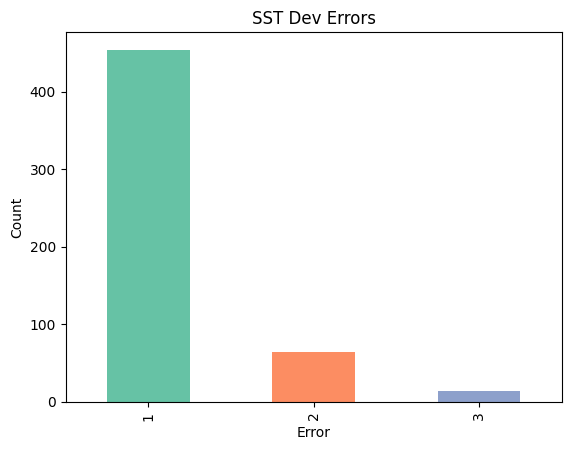

In [126]:
# Plotting
# Grouping by absolute error and counting occurrences
error_counts = sst_dev_merge_errors_only.groupby("sst_abs_error").size()

# Plotting
ax = error_counts.plot(kind='bar', color=plt.cm.Set2.colors)

# Set title and axis labels
plt.title('SST Dev Errors')
plt.xlabel('Error')
plt.ylabel('Count')

# Show plot
plt.show()

In [114]:
para_dev_merge.sort_values(by = "para_abs_error", ascending = False, inplace=True)
para_dev_merge

,sentence1,sentence2,label_true,id,label_pred,para_abs_error
15524,what 's your favourite jackie chan movie ?,what are the best movies of jackie chan ?,0,6e22cf445d5782763453ef66e,1.0,1.0
5010,is it safe for a dog to eat raw meat ?,is it safe for dogs to eat rotten meat ?,0,2ee3f7df4f309afa6df8544b4,1.0,1.0
4887,why does india have immigration checks/passpor...,what does immigration officers check on their ...,1,57ee878bfda6a39d12ac6332e,0.0,1.0
15979,how should i learn hacking by myself ?,how do you learn to hack ?,0,f0226f83bace2ae93d0e2ed7b,1.0,1.0
4894,what 's your biggest regret in life ?,what is your biggest mistake or regret ?,0,7069625bb5a1353067f196c71,1.0,1.0
...,...,...,...,...,...,...
7229,what are the places to be visited in goa ?,what places should one visit in goa ?,1,22239f11c4f6117a009976ce9,1.0,0.0
7228,how can i get beautiful skin ?,what is the job outlook as a northcentral univ...,0,010f047cd225a73ddebd8b7f2,0.0,0.0
7227,how can i beat my laziness ?,how can i beat laziness ?,1,76b9819a12c4f88be60e0d1b5,1.0,0.0
7226,how do i speak english fluently ?,how can i speak english more fluently ?,1,23f9b29f75d19ca01e4503d8a,1.0,0.0


In [116]:
print(para_dev_merge.iloc[0].sentence1, "-", para_dev_merge.iloc[0].sentence2)
print(para_dev_merge.iloc[1].sentence1, "-", para_dev_merge.iloc[1].sentence2)
print(para_dev_merge.iloc[2].sentence1, "-", para_dev_merge.iloc[2].sentence2)

what 's your favourite jackie chan movie ? - what are the best movies of jackie chan ?
is it safe for a dog to eat raw meat ? - is it safe for dogs to eat rotten meat ?
why does india have immigration checks/passport control while leaving the country ? - what does immigration officers check on their screen while leaving india ?


In [123]:
print(para_dev_merge.loc[7226].sentence1, "-", para_dev_merge.loc[7226].sentence2)

how do i speak english fluently ? - how can i speak english more fluently ?


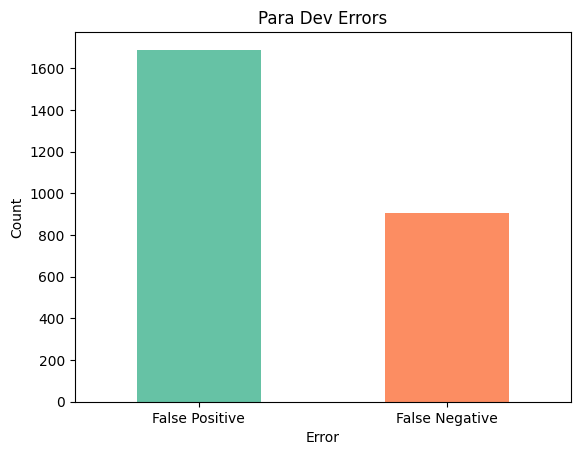

In [136]:
para_dev_errors = para_dev_merge[para_dev_merge.para_abs_error > 0]
para_error_counts = para_dev_errors.groupby("label_true").count()["para_abs_error"]
# much more likely to not be a paraphrase
#  we predict as a paraphrase

# Plotting
ax = para_error_counts.plot(kind='bar', color=plt.cm.Set2.colors)

# Set title and axis labels
plt.title('Para Dev Errors')
plt.xlabel('Error')
plt.ylabel('Count')
# set x column labels
plt.xticks(range(len(para_error_counts)), ["False Positive", "False Negative"], rotation=0)

# Show plot
plt.show()

In [130]:
sts_dev_merge.sort_values(by = "sts_abs_error", ascending = False, inplace=True)
sts_dev_merge

,sentence1,sentence2,label_true,id,label_pred,sts_abs_error
327,"in these days of googling , it 's sloppy to no...","i agree with kate sherwood , you should be abl...",3.2,89bf7c70f9b1f2708b5975263,0.111488,3.088512
22,work into it slowly .,it seems to work .,0.0,82d73bd38fd66ecf53f564bcf,2.922333,2.922333
781,carney sets high bar to change at boe,carney sets high bar to changes at bank of eng...,5.0,bb4f3617f2d46fb35b2e1c372,2.414650,2.585350
133,a girl is talking to her dad on a cellphone .,a girl is talking on her phone .,4.4,05fa1a00dccec7069af8865bb,1.956216,2.443784
731,firefighters battle forest fire in sw china,firefighters battling scrub fire in hokianga,3.4,6bb89f44fe84456a7d23ff0c9,1.142871,2.257129
...,...,...,...,...,...,...
206,i am ok with medical use!,i am ok with medical use!!,5.0,22846904ac9201da3dfadd3a2,5.005241,0.005241
214,queen pays tribute to nelson mandela,south africa 's rugby fraternity mourns mandela,1.0,10aee326414312b036bf46135,1.002906,0.002906
552,a woman holding a small baby .,a smiling woman holding a small baby .,4.0,37476af51623e045646287d1c,3.997361,0.002639
458,"a man sitting cross legged on the grass , with...",ocean liner close to coast with houses in the ...,0.0,5c4d883430a5812f3b8a16700,-0.000504,0.000504


In [131]:
print(sts_dev_merge.iloc[0].sentence1, "-", sts_dev_merge.iloc[0].sentence2)

in these days of googling , it 's sloppy to not find the source of a quotation . - i agree with kate sherwood , you should be able to attribute most quotes these days by simple fact checking .


Text(0, 0.5, 'Count')

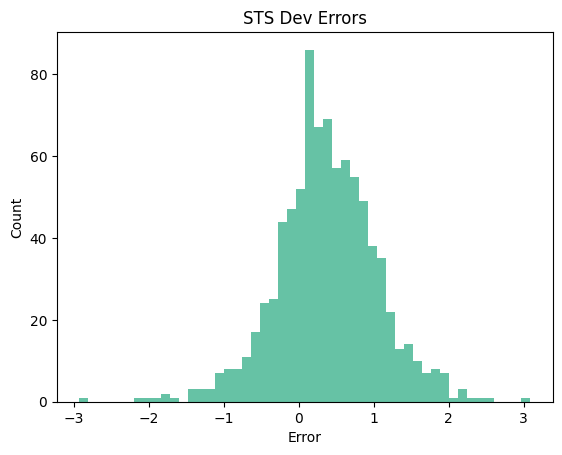

In [135]:
# plot the sts_error
sts_dev_merge.sts_error.plot(kind='hist', bins=50, color=plt.cm.Set2.colors)
plt.title('STS Dev Errors')
plt.xlabel('Error')
plt.ylabel('Count')
